(10, 1065, 1030)
(10, 1065, 1030)
(10, 1065, 1030)
(10, 1065, 1030)


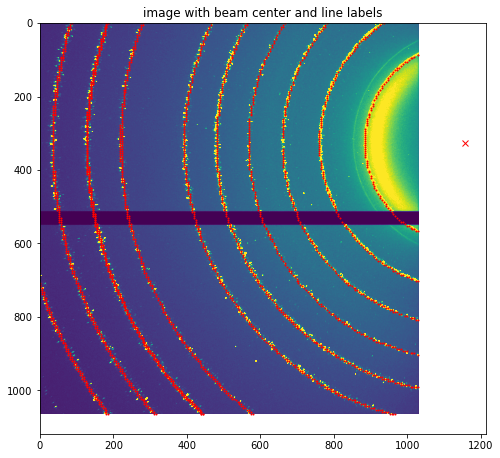

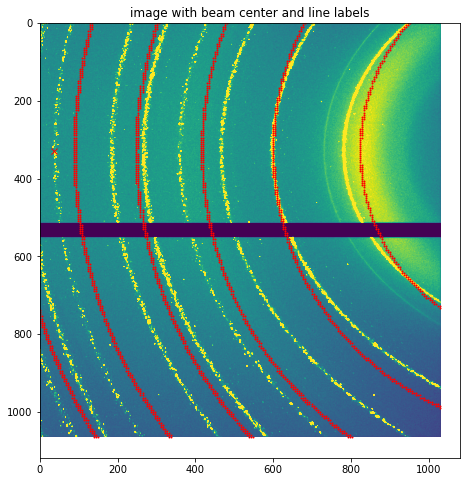

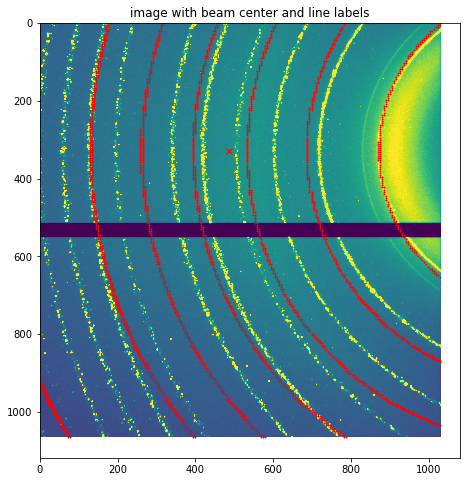

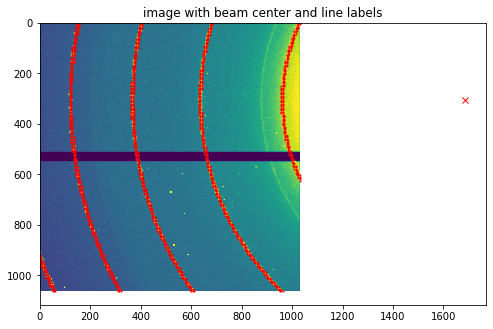

In [22]:
%reload_ext autoreload
%autoreload 2
import h5py
import hdf5plugin
import correction
import os 
import numpy as np
#Data Files


experiment_dir = '/data/visitors/balder/20220115/2022022408/raw/XRD Eiger Test'
poni_dir = '/data/visitors/balder/20220115/2022022408/process'
stacks = {
    "no_tilt_close": {
        "filename": 'LaB6_9_data_000001.h5',
        "poni": 'samuel_9_0.poni'
    },
    "large_tilt_close": {
        "filename": 'LaB6_10_data_000001.h5',
        "poni": 'samuel_10_0.poni'
    },
    "small_tilt_close": {
        "filename": 'LaB6_11_data_000001.h5',
        "poni": 'samuel_11_0.poni'
    },
    "no_tilt_far": {
        "filename": 'LaB6_13_data_000001.h5',
        "poni": 'samuel_13_0.poni'
    }
}

icsdfilepath = os.path.join(experiment_dir,'LaB6-icsd.txt')
#Parameters
pl = 75  # pixel length, in micrometers 
pw = 450 # pixel width, in micrometers
ph = 75  # pixel height, in micrometers
pixel_dimensions = (pl, pw, ph)

def load_stack(name):
    stack = stacks[name]
    image_path = os.path.join(experiment_dir, stack["filename"])
    with h5py.File(image_path,'r') as h5f:
        data = h5f['/entry/data/data']
        data = np.squeeze(data)
    poni_path = os.path.join(poni_dir, stack["poni"])
    poni = correction.load_poni(poni_path)
    return poni, data


analysis = {}
for stack_name in stacks.keys():
    poni, data = load_stack(stack_name)
    print(data.shape)
    img, mask = correction.mask(data[0])
    deg_xtth, tth_hkl, det_params_b711 = correction.azimutal_fit(img, poni, icsdfilepath, pixel_dimensions)
    correction.plot_fit(img, poni, det_params_b711, tth_hkl, pixel_dimensions)
    #recovered_img = correction.correct_depth_spill(img, poni, pixel_dimensions)
    #correction.plot_compare_images(img, recovered_img)
    #az_before = correction.azimutal_integration(img, mask, deg_xtth, tth_hkl, det_params_b711)
    #az_after = correction.azimutal_integration(recovered_img, mask, deg_xtth, tth_hkl, det_params_b711)
    #correction.plot_compare_peaks(az_before, az_after, deg_xtth, tth_hkl)
    #correction.plot_compare_peak_fit(az_before, az_after, deg_xtth, tth_hkl)
    analysis[stack_name] = {
        "img": img,
        "mask": mask,
        "az_before": az_before,
        "az_after": az_after,
        
    }
